<a href="https://colab.research.google.com/github/albarabimakasa/ZALANDO/blob/main/zalando_convolutional_neural_network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

data preprocessing.

In [ ]:
kategori = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shrit', 'Sneaker', 'Bag', 'Ankle boot']

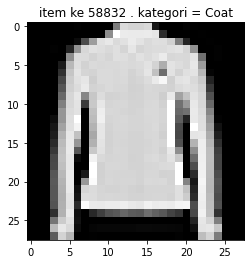

In [ ]:
i = random.randint(1, len(X_train))
plt.figure()
plt.imshow(X_train[i,:,:], cmap='gray')
plt.title('item ke {} . kategori = {}' .format(i, kategori[y_train[i]]))
plt.show()

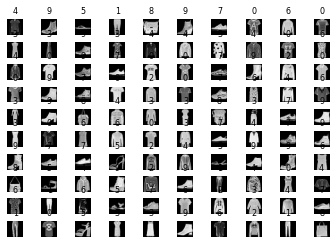

In [ ]:
nrow = 10
ncol = 10
fig, axes = plt.subplots(nrow, ncol)
axes = axes.ravel()
ntraining = len(X_train)
for i in np.arange(0, nrow*ncol):
  indexku = np.random.randint(0, ntraining)
  axes[i].imshow(X_train [indexku,:,:], cmap = 'gray')
  axes[i].set_title(int(y_train[indexku]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
#normalisasi data set
X_train = X_train/225
X_test = X_test/225

In [ ]:
#validate set random state
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=123)

In [ ]:
#chanel 1=hitam putih 3=gambar warna
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

data preprosesing selesai. setelah ini masuk ke deep learning.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam 

definisikan model cnn

In [ ]:
#gunakan model sequential
classifier = Sequential()

In [ ]:
#convolution
classifier.add(Conv2D(32,(3,3), input_shape=(28, 28, 1) , activation = 'relu'))

In [ ]:
#pooling
classifier.add(MaxPooling2D(pool_size=(2,2))) 

In [ ]:
#dropout digunakan untuk mengeneralisir model dan menghindari overfitting
classifier.add(Dropout(0.25))

memulai flattening dan fully connected neural network 

In [ ]:
classifier.add(Flatten())


In [ ]:
#dense digunakan untuk menentukan berapa banyak input seperti node atau nukleus
classifier.add(Dense(activation='relu', units=32))

In [ ]:
#activation hidden layer
classifier.add(Dense(activation='sigmoid', units=10)) #unit=10 karena kategori =10

In [ ]:
#compile=menjalankan
classifier.compile(loss='sparse_categorical_crossentropy',
                   optimizer=Adam(lr=0.001),
                   metrics=['accuracy'])

fully connected layer sudah selesai lanjut periksa summary

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

visualisasi neural network

In [ ]:
from keras.utils.vis_utils import plot_model

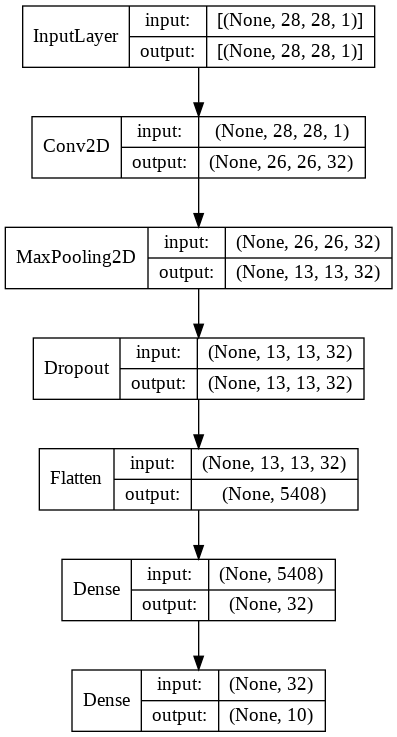

In [ ]:
plot_model (classifier, to_file='ini_model_NN_saya.png',
            show_shapes = True,
            show_layer_names = False)


In [ ]:
#start training model
run_model = classifier.fit(X_train, y_train,
                           batch_size = 480,
                           epochs = 30,
                           verbose = 1,
                           validation_data = (X_validate, y_validate))

#loss = cost function / error => semakin mendekati 0 semakin bagus

Epoch 1/30
100/100 [==============================] - 19s 181ms/step - loss: 1.0895 - accuracy: 0.6321 - val_loss: 0.4712 - val_accuracy: 0.8401
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4513 - accuracy: 0.8401 - val_loss: 0.3984 - val_accuracy: 0.8654
Epoch 3/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3933 - accuracy: 0.8631 - val_loss: 0.3741 - val_accuracy: 0.8680
Epoch 4/30
100/100 [==============================] - 18s 178ms/step - loss: 0.3621 - accuracy: 0.8747 - val_loss: 0.3473 - val_accuracy: 0.8806
Epoch 5/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3411 - accuracy: 0.8785 - val_loss: 0.3413 - val_accuracy: 0.8823
Epoch 6/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3288 - accuracy: 0.8845 - val_loss: 0.3265 - val_accuracy: 0.8896
Epoch 7/30
100/100 [==============================] - 18s 177ms/step - loss: 0.3169 - accuracy: 0.8882 - val_loss: 0.3120 - val_ac

In [ ]:
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


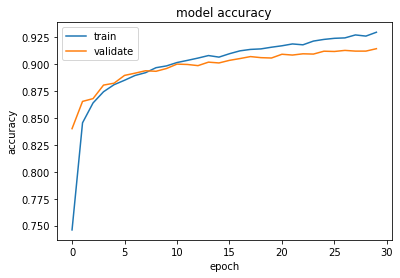

In [ ]:
#plotting

plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


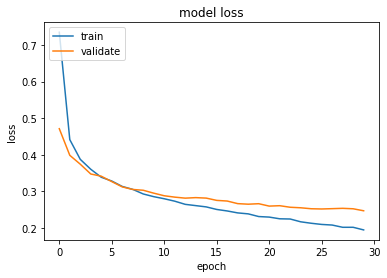

In [ ]:
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
#evaluasi model cnn
evaluasi = classifier.evaluate(X_test, y_test)
print('test sccuracy ={:.2f}%'.format(evaluasi[1]*100))

313/313 [==============================] - 2s 6ms/step - loss: 0.2584 - accuracy: 0.9087
test sccuracy =90.87%


In [ ]:
classifier.save('model_cnn_fashion.hd5', include_optimizer=True)
print('model sudah disimpan')

INFO:tensorflow:Assets written to: model_cnn_fashion.hd5/assets
model sudah disimpan


In [ ]:
"""
jika ingin menload data 

from keras models import load model
classifier = load_model('model_cnn_fashion.hd5')
"""

"\njika ingin menload data \n\nfrom keras models import load model\nclassifier = load_model('model_cnn_fashion.hd5')\n"

In [ ]:
hasil_prediksi = classifier.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


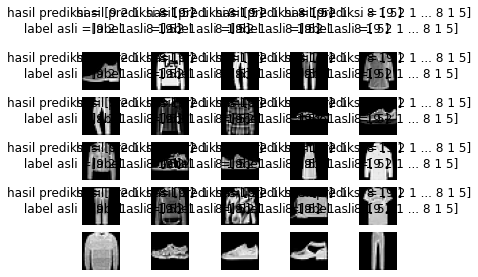

In [ ]:
fig, axes =plt.subplots(5,5)
axes = axes.ravel()
for i in np.arange(0,5*5):
  axes[i].imshow(X_test[i]. reshape(28,28), cmap = 'gray')
  axes[i].set_title('hasil prediksi = {}\n label asli ={}\n '.format(hasil_prediksi, y_test))
  axes[i].axis('off')


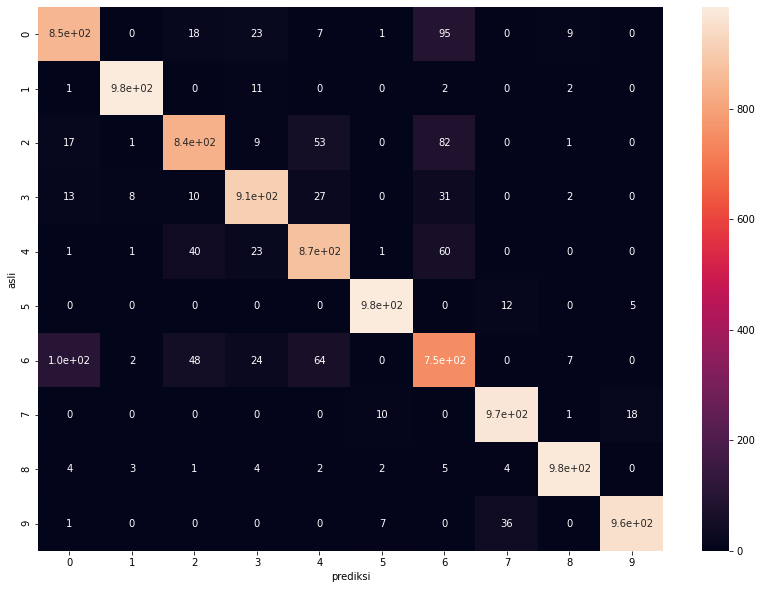

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, hasil_prediksi)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test), index = np.unique(y_test))
cm_label.index.name = 'asli'
cm_label.columns.name = 'prediksi'
plt.figure(figsize=(14,10))
sns.heatmap(cm_label, annot=True)

In [ ]:
from sklearn.metrics import classification_report
jumlah_kategori = 10
nama_target = ['kategori {}' .format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, hasil_prediksi, target_names=nama_target))

              precision    recall  f1-score   support

  kategori 0       0.86      0.85      0.85      1000
  kategori 1       0.98      0.98      0.98      1000
  kategori 2       0.88      0.84      0.86      1000
  kategori 3       0.91      0.91      0.91      1000
  kategori 4       0.85      0.87      0.86      1000
  kategori 5       0.98      0.98      0.98      1000
  kategori 6       0.73      0.75      0.74      1000
  kategori 7       0.95      0.97      0.96      1000
  kategori 8       0.98      0.97      0.98      1000
  kategori 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

